# packages

In [129]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

# imports

In [5]:
import pandas as pd
import numpy as np
import json
import csv
import os

# Reading

In [44]:
df = pd.read_csv(filepath_or_buffer="data/extraction consolidation results_V0_3.csv",sep=";", encoding="latin-1")

In [45]:
result = df['Title'].to_list()

In [46]:
result = list(dict.fromkeys(result))
print(len(result))

29


In [47]:
titles = list(df.columns)

In [48]:
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")

In [49]:
metadata = metadata.drop_duplicates(subset=['Title'])

In [50]:
data = df.merge(metadata, how='left', on='Title')
#unique function

In [51]:
del metadata
del df
del titles

In [52]:
index = 0
for row in data:
    print(index, row)
    index += 1

0 Title
1 DT Definition
2 virtual space
3 Kritzinger
4 DT is specific
5 modeling language
6 note on modeling language
7 model type
8 model processing technique
9 model usage technique
10 source
11 target
12 purpose of MDE application
13 purpose of DT
14 DTPurposeCategory
15 use case domain
16 system lifecycle phase
17 twinning target
18 twin lifecycle phase
19 purpose /expected benefit of using models
20 open challenges
21 Technological Readiness Level
22 notes
23 Use Case
24 Publication Title
25 Authors
26 Publication Year
27 Document Identifier
28 Publisher


# Formatting Data

In [53]:
modelTrafos = 'modelTrafos'

In [54]:
out_menge_1 = {}
for key in result:
    out_menge_1[key] = {'DT_Definition':None,
                        modelTrafos:{}, 
                        'open challenges':None,
                        'Technological Readiness Level':None, 
                        'notes':None, 
                        'Use Case':None, 
                        'twinning target': None, 
                        'use case domain':None,
                        'virtual space':None,
                        'Kritzinger':None,
                        'DT is specific':None,
                        'modeling language':[],
                        'purpose of DT':None,
                        'DTPurposeCategory':None
                        }

In [55]:
data.reset_index()
for title in result:
    rownum = 0
    
    for index, row in data.iterrows():
        if title == row['Title'] and not pd.isna(title):
            rowcopy = row.__deepcopy__()
            
            if row['DT Definition'] is not None and not pd.isna(row['DT Definition']):
                out_menge_1[title]['DT_Definition'] = row['DT Definition']

            if row['purpose of DT'] is not None and not pd.isna(row['purpose of DT']):
                out_menge_1[title]['purpose of DT'] = row['purpose of DT']

            if row['DTPurposeCategory'] is not None and not pd.isna(row['DTPurposeCategory']):
                out_menge_1[title]['DTPurposeCategory'] = row['DTPurposeCategory']

            if row['use case domain'] is not None and not pd.isna(row['use case domain']):
                out_menge_1[title]['use case domain'] = row['use case domain']
            
            if row['twinning target'] is not None and not pd.isna(row['twinning target']):
                if out_menge_1[title]['twinning target'] is None:
                    out_menge_1[title]['twinning target'] = row['twinning target']
                else:
                    out_menge_1[title]['twinning target'] += ";"
                    out_menge_1[title]['twinning target'] +=  row['twinning target']

            if row['purpose /expected benefit of using models'] is not None and not pd.isna(row['purpose /expected benefit of using models']):
                out_menge_1[title]['purpose /expected benefit of using models'] = row['purpose /expected benefit of using models']

            if row['open challenges'] is not None and not pd.isna(row['open challenges']):
                out_menge_1[title]['open challenges'] = row['open challenges']

            if row['Technological Readiness Level'] is not None and not pd.isna(row['Technological Readiness Level']):
                out_menge_1[title]['Technological Readiness Level'] = row['Technological Readiness Level']
            
            if row['notes'] is not None and not pd.isna(row['notes']):
                out_menge_1[title]['notes'] = row['notes']

            if row['Use Case'] is not None and not pd.isna(row['Use Case']):
                out_menge_1[title]['Use Case'] = row['Use Case']

            if row['Publication Title'] is not None and not pd.isna(row['Publication Title']):
                out_menge_1[title]['Publication Title'] = row['Publication Title']
            
            if row['Authors'] is not None and not pd.isna(row['Authors']):
                out_menge_1[title]['Authors'] = row['Authors']
            
            if row['Publication Year'] is not None and not pd.isna(row['Publication Year']):
                out_menge_1[title]['Publication Year'] = row['Publication Year']

            if row['Document Identifier'] is not None and not pd.isna(row['Document Identifier']):
                out_menge_1[title]['Document Identifier'] = row['Document Identifier']

            if row['Publisher'] is not None and not pd.isna(row['Publisher']):
                out_menge_1[title]['Publisher'] = row['Publisher']
            if row['DT Definition'] is not None and pd.isna(row['DT Definition']):
                if row['virtual space'] is not None and not pd.isna(row['virtual space']):
                    out_menge_1[title]['virtual space'] = row['virtual space']
            
                if row['Kritzinger'] is not None and not pd.isna(row['Kritzinger']):
                    out_menge_1[title]['Kritzinger'] = row['Kritzinger']
            
                if row['DT is specific'] is not None and not pd.isna(row['DT is specific']):
                    out_menge_1[title]['DT is specific'] = row['DT is specific']
            
            if row['modeling language'] is not None and not pd.isna(row['modeling language']):
                out_menge_1[title]['modeling language'].append(row['modeling language'])

            # multiple Trafos
            arrayindexes = [0,1,2,3,4,5,6,13,10+4,11+4,13+4,15+4,16+4,17+4,18+4,19+4,20+4,21+4,22+4,23+4,24+4]
            rowjson = rowcopy.drop(row.iloc[arrayindexes].index).to_json()
            out_menge_1[title][modelTrafos][rownum] = rowjson
            #out_menge_1[title]['data'][rownum].append(rowjson)
            rownum+=1


In [56]:
del rowjson
del rowcopy
del result
del rownum

In [40]:
try:
    os.mkdir('target/')
    os.mkdir('target/img/')
except OSError as error:
    print(error)

[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'target/'


# Data analysis

## Year counter

In [145]:
year2020 = 0
year2021 = 0
year2022 = 0
year2023 = 0

In [146]:
for key in out_menge_1:
    if pd.isna(key):
        continue
    if out_menge_1[key]['Publication Year'] == 2020:
        year2020+=1
    if out_menge_1[key]['Publication Year'] == 2021:
        year2021+=1
    if out_menge_1[key]['Publication Year'] == 2022:
        year2022+=1
    if out_menge_1[key]['Publication Year'] == 2023:
        year2023+=1

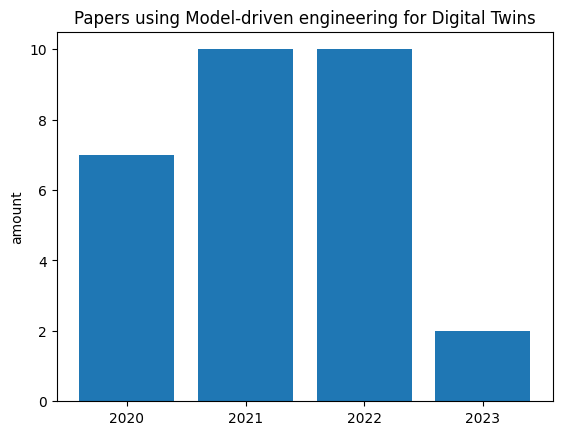

In [147]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['2020', '2021', '2022', '2023']
counts = [year2020, year2021, year2022, year2023]
bar_labels = [2020,2021,2022,2023]
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('amount')
ax.set_title('Papers using Model-driven engineering for Digital Twins')

plt.savefig('target/img/years.png')

plt.show()

In [148]:
del year2020 
del year2021 
del year2022 
del year2023 
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

## system life cycle

In [149]:
Design = 0
Implement = 0
Operate = 0
Maintain = 0
NotDefined = 0

In [150]:
for key in out_menge_1:
    if pd.isna(key):
        continue
    for entry in out_menge_1[key][modelTrafos]:
        #guard with if trafo
        slcp = json.loads(out_menge_1[key][modelTrafos][entry])['system lifecycle phase']
        if slcp is None:
            NotDefined+=1
            continue
        if "Design" in slcp:
            Design+=1
        if "Implement" in slcp:
            Implement+=1
        if "Operate" in slcp:
            Operate+=1
        if "Maintain" in slcp:
            Maintain+=1
        

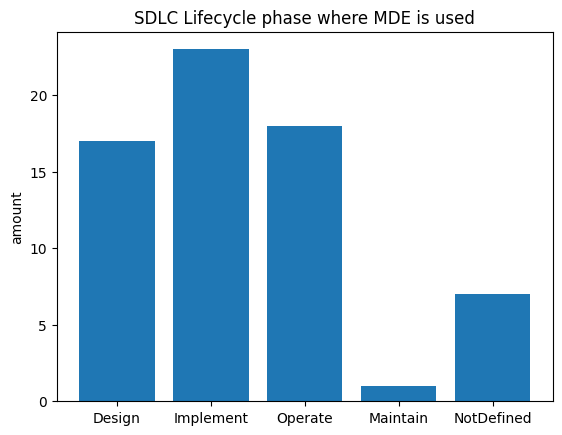

In [151]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['Design', 'Implement', 'Operate', 'Maintain', 'NotDefined']
counts = [Design, Implement, Operate, Maintain, NotDefined]
bar_labels = ['Design', 'Implement', 'Operate', 'Maintain', 'NotDefined']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('amount')
ax.set_title('SDLC Lifecycle phase where MDE is used')

plt.savefig('target/img/Lifecycle_phase.png')

#savefig(fname, *, dpi='figure', format=None, metadata=None,
#        bbox_inches=None, pad_inches=0.1,
#        facecolor='auto', edgecolor='auto',
#        backend=None, **kwargs
#       )
plt.show()

In [152]:
del Design 
del Implement 
del Operate 
del Maintain 
del NotDefined 
del slcp
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

# Goals
was sind die modelle
gibt es einen Trend Authoren Und Modelle
Zeit Modell Trends


Modell Trafo in Zusammenhand zur Definition


2.1: What are twinned systems, and what is the purpose of the DT in these systems?  
2.2: Which techniques are applied in which domains?  
2.3: Which techniques are applied in which lifecycle phases of the twin/twinned system?  

What? Which modeling techniques are used, and how does this use change oder
time? 

Which model types are used, which modeling languages does each type contain,
and how does the used model type change over time?

What are sources/targets for each MDE technique?
What is the technological readyness level of the found solutions?

where? For which domains/twinning targets/system/twinning lifecycle phases are
twins used? combined with what?


split by year -> dev over the years -> linechart

lang - MDE Tech

MDE Technique(purpose) - use case domain(purpose) - twinning target


domain_target_count = {}
for key in out_menge_1:
    if pd.isna(key):
        continue
    if out_menge_1[key]['twinning target'] is not None:
        targetdomains = out_menge_1[key]['twinning target'].split(';')
        for domain in targetdomains:
            try:
                domain_target_count[domain].update({out_menge_1[key]['use case domain']:domain_target_count[domain][out_menge_1[key]['use case domain']]+1})
            except KeyError as err:
                try:
                    domain_target_count[domain].update({out_menge_1[key]['use case domain']:1})
                except KeyError as err2:
                    domain_target_count.update({domain: {out_menge_1[key]['use case domain']:1}})
print(domain_target_count)
dtc = json.dumps(domain_target_count)
print(dtc)
with open("target/json/temp.json", "w") as outfile:
    outfile.write(dtc)

## use-case domain <-> twinning target

In [153]:
dataformat = {'Individual Systems, such as automated cars (Atorf and Ro\u00dfmann, 2018), gas turbines (Dawes et al., 2019), or manufacturing machines (Debroy et al., 2017).': 0,
              'Systems of Systems, such as complete factories (Biesinger et al., 2018), oil wells (Kosenkov et al., 2018), or railway systems (Vatn, 2018).':0,
              'Processes, e.g., business processes (Rambow-Hoeschele et al., 2018), medical processes (Karakra et al., 2018), or recycling processes (Popa et al., 2018).':0,
              }

In [17]:
domain_target_count = {}
for key in out_menge_1:
    if pd.isna(key):
        continue
    if out_menge_1[key]['twinning target'] is not None:
        targetdomains = out_menge_1[key]['twinning target'].split(';')
        for domain in targetdomains:
            target = out_menge_1[key]['use case domain']
            try:
                domain_target_count[target][domain] += 1
            except KeyError as err:
                targetformat = dataformat.copy()
                targetformat[domain] += 1
                domain_target_count.update({target: targetformat})

print(domain_target_count)
dtc = json.dumps(domain_target_count)
print(dtc)
with open("target/json/data_consolidated_semistructured.json", "w") as outfile:
    outfile.write(dtc)

{}
{}


In [155]:
arr = []
for target in domain_target_count:
    innerarr = []
    for domain in domain_target_count[target]:
        innerarr.append(domain_target_count[target][domain])
    arr.append(innerarr)
print(arr)

[[4, 0, 0], [6, 3, 1], [1, 0, 0], [1, 0, 1], [0, 0, 1], [3, 0, 0], [2, 1, 0], [0, 1, 0], [2, 0, 0]]


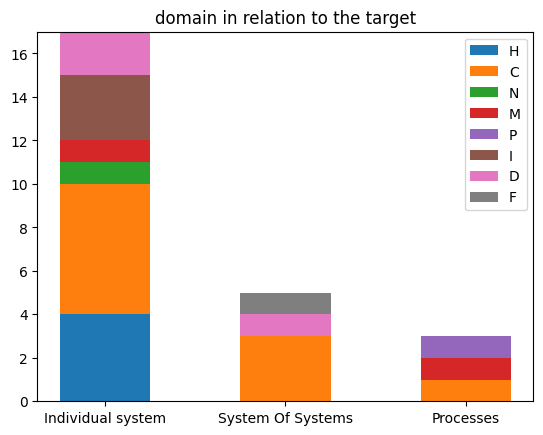

In [156]:
import matplotlib.pyplot as plt

species = (
    "Individual system",
    "System Of Systems",
    "Processes",
)

weight_counts = {
    "H": np.array(arr[0]),
    "C": np.array(arr[1]),
    "N": np.array(arr[2]),
    "M": np.array(arr[3]),
    "P": np.array(arr[4]),
    "I": np.array(arr[5]),
    "D": np.array(arr[6]),
    "F": np.array(arr[7]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("domain in relation to the target")
ax.legend(loc="upper right")

plt.savefig('target/img/targetandUseDomain.png')

plt.show()


In [157]:
del ax
del arrayindexes
del bottom
del domain_target_count
del innerarr
del arr
del targetdomains


## 2.1

## 2.2

In [158]:
twinnedsystesms = []

## DT Definition

## DT

### twinning target

In [159]:
individual = 0
sys_of_sys = 0
bio = 0
product = 0
process = 0
other = 0
NotDefined = 0

In [160]:
categories = ['Individual Systems, such as automated cars (Atorf and Roßmann, 2018), gas turbines (Dawes et al., 2019), or manufacturing machines (Debroy et al., 2017).',
              'Systems of Systems, such as complete factories (Biesinger et al., 2018), oil wells (Kosenkov et al., 2018), or railway systems (Vatn, 2018).',
              'Biological Beings, such as factory employees (Graessler and Poehler, 2018), fishes (Joordens and Jamshidi, 2018), or sports players (Balachandar and Chinnaiyan, 2019).',
              'Products, such as reinforced plastics (Wang et al., 2018), sunroof ring frames (Wärmefjord et al., 2017), or wearable masks (Zheng et al., 2018).',
              'Processes, e.g., business processes (Rambow-Hoeschele et al., 2018), medical processes (Karakra et al., 2018), or recycling processes (Popa et al., 2018).',
              'Other counterparts, e.g., arbitrary physical bodies (El Saddik, 2018) or unspecified manufacturing resources (Lu and Xu, 2018b).']

In [161]:
for key in out_menge_1:
    if pd.isna(key):
        continue
    try:
        if categories[0] in out_menge_1[key]['twinning target']:
            individual+=1
        if categories[1] in out_menge_1[key]['twinning target']:
            sys_of_sys+=1
        if categories[2] in out_menge_1[key]['twinning target']:
            bio+=1
        if categories[3] in out_menge_1[key]['twinning target']:
            product+=1
        if categories[4] in out_menge_1[key]['twinning target']:
            process+=1
        if categories[5] in out_menge_1[key]['twinning target']:
            other+=1
    
    except TypeError as err:
        NotDefined+=1

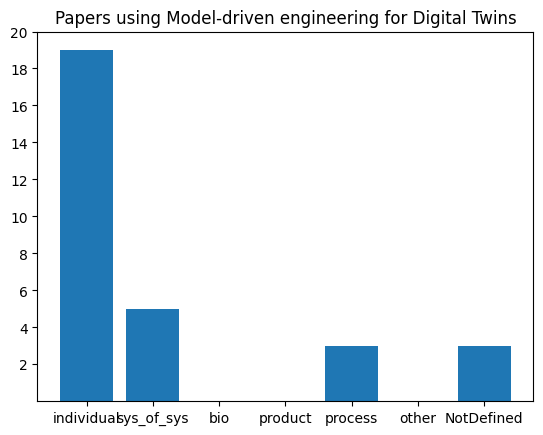

In [162]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['individual', 'sys_of_sys', 'bio', 'product', 'process', 'other', 'NotDefined']
counts = [individual, sys_of_sys, bio, product, process, other, NotDefined]
bar_labels = ['individual', 'sys_of_sys', 'biological', 'product', 'process', 'other', 'NotDefined']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_yticks([2,4,6,8,10,12,14,16,18,20])
ax.set_ylim([0, 20])
ax.set_title('Papers using Model-driven engineering for Digital Twins')

plt.savefig('target/img/twinningtarget.png')

plt.show()

In [163]:
del individual 
del sys_of_sys 
del bio 
del product 
del process 
del other
del categories
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

### twin life cycle phase

### use case domain

### Technological Readiness

### modeling language

## MDE

### model type

In [164]:
structure = 0
behavior = 0
physics = 0
rule = 0
geometry = 0
NotDefined = 0

In [165]:
for key in out_menge_1:
    if pd.isna(key):
        continue
    for entry in out_menge_1[key][modelTrafos]:
        slcp = json.loads(out_menge_1[key][modelTrafos][entry])['model type']
        if slcp is None:
            NotDefined+=1
            continue
        if "structure" in slcp:
            structure+=1
        if "behavior" in slcp:
            behavior+=1
        if "physics" in slcp:
            physics+=1
        if "rule" in slcp:
            rule+=1
        if "geometry" in slcp:
            geometry+=1

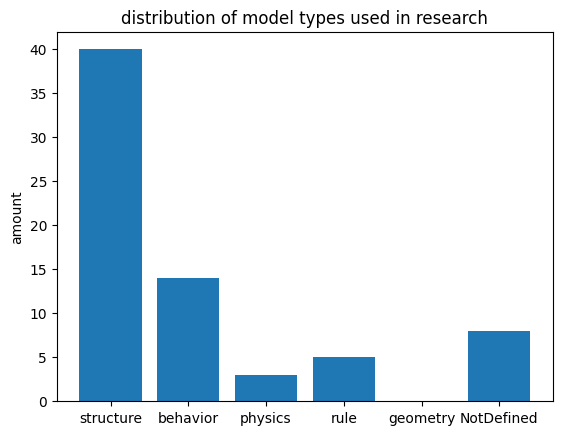

In [166]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['structure', 'behavior', 'physics', 'rule', 'geometry', 'NotDefined']
counts = [structure, behavior, physics, rule, geometry, NotDefined]
bar_labels = ['structure', 'behavior', 'physics', 'rule', 'geometry', 'NotDefined']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('amount')
ax.set_title('distribution of model types used in research')

plt.savefig('target/img/modelTypes.png')

plt.show()

In [167]:
del structure
del behavior
del physics
del rule
del geometry
del NotDefined 
del slcp
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

### model processing technique + from&to

### purpose of MDE technique

### purpose/benefit of using models

## to json

In [57]:
json_object = json.dumps(out_menge_1, indent = 4) 

In [24]:
try:
    os.remove("target/json/data_consolidated_semistructured.json")
except OSError as error:
    print(error)

In [170]:
try:
    os.mkdir('target/json/')
except OSError as error:
    print(error)

[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'target/json/'


In [58]:
with open("target/json/data_consolidated_semistructured.json", "w") as outfile:
    outfile.write(json_object)

## eine runde fegen

In [172]:
del json_object
del outfile
del title
del row
del key
del entry
del index